# 01_EDA_Kepler

📊 APERÇU DU DATASET
Shape: (9564, 35)

Premières lignes:
      kepid kepoi_name koi_disposition  koi_period  koi_period_err1  \
0  10797460  K00752.01       CONFIRMED    9.488036     2.775000e-05   
1  10797460  K00752.02       CONFIRMED   54.418383     2.479000e-04   
2  10811496  K00753.01       CANDIDATE   19.899140     1.494000e-05   
3  10848459  K00754.01  FALSE POSITIVE    1.736952     2.630000e-07   
4  10854555  K00755.01       CONFIRMED    2.525592     3.761000e-06   

   koi_period_err2  koi_impact  koi_impact_err1  koi_impact_err2  \
0    -2.775000e-05       0.146            0.318           -0.146   
1    -2.479000e-04       0.586            0.059           -0.443   
2    -1.494000e-05       0.969            5.126           -0.077   
3    -2.630000e-07       1.276            0.115           -0.092   
4    -3.761000e-06       0.701            0.235           -0.478   

   koi_duration  ...  koi_steff  koi_steff_err1  koi_steff_err2  koi_slogg  \
0       2.95750  ...     5455

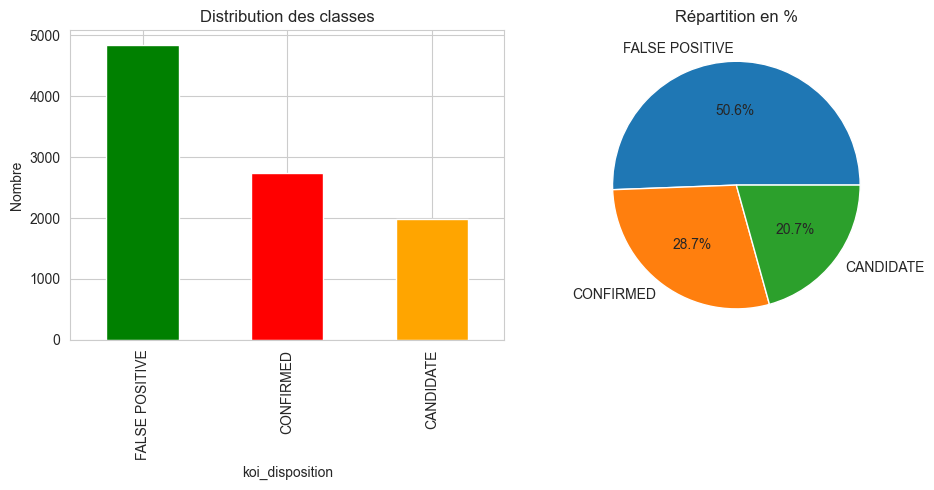


❓ VALEURS MANQUANTES
                   Missing  Percentage
koi_teq_err2          9564  100.000000
koi_teq_err1          9564  100.000000
koi_steff_err2         483    5.050188
koi_steff_err1         468    4.893350
koi_slogg_err1         468    4.893350
koi_slogg_err2         468    4.893350
koi_srad_err1          468    4.893350
koi_srad_err2          468    4.893350
koi_period_err2        454    4.746968
koi_impact_err1        454    4.746968
koi_impact_err2        454    4.746968
koi_period_err1        454    4.746968
koi_duration_err1      454    4.746968
koi_duration_err2      454    4.746968
koi_depth_err1         454    4.746968
koi_depth_err2         454    4.746968
koi_steff              363    3.795483
koi_model_snr          363    3.795483
koi_prad_err2          363    3.795483
koi_teq                363    3.795483
koi_prad_err1          363    3.795483
koi_prad               363    3.795483
koi_depth              363    3.795483
koi_srad               363    3.795483
koi

<Figure size 1200x600 with 0 Axes>

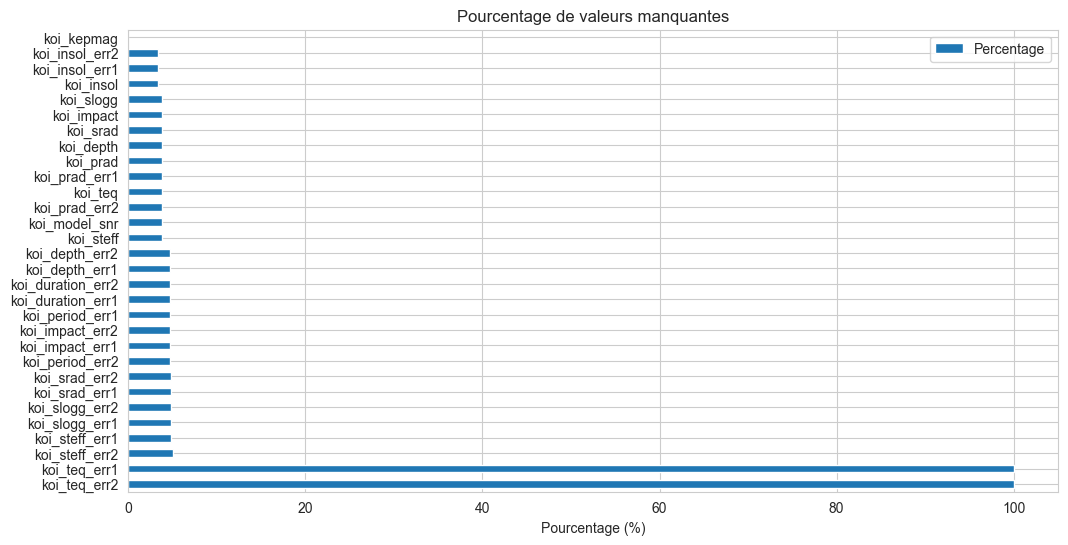

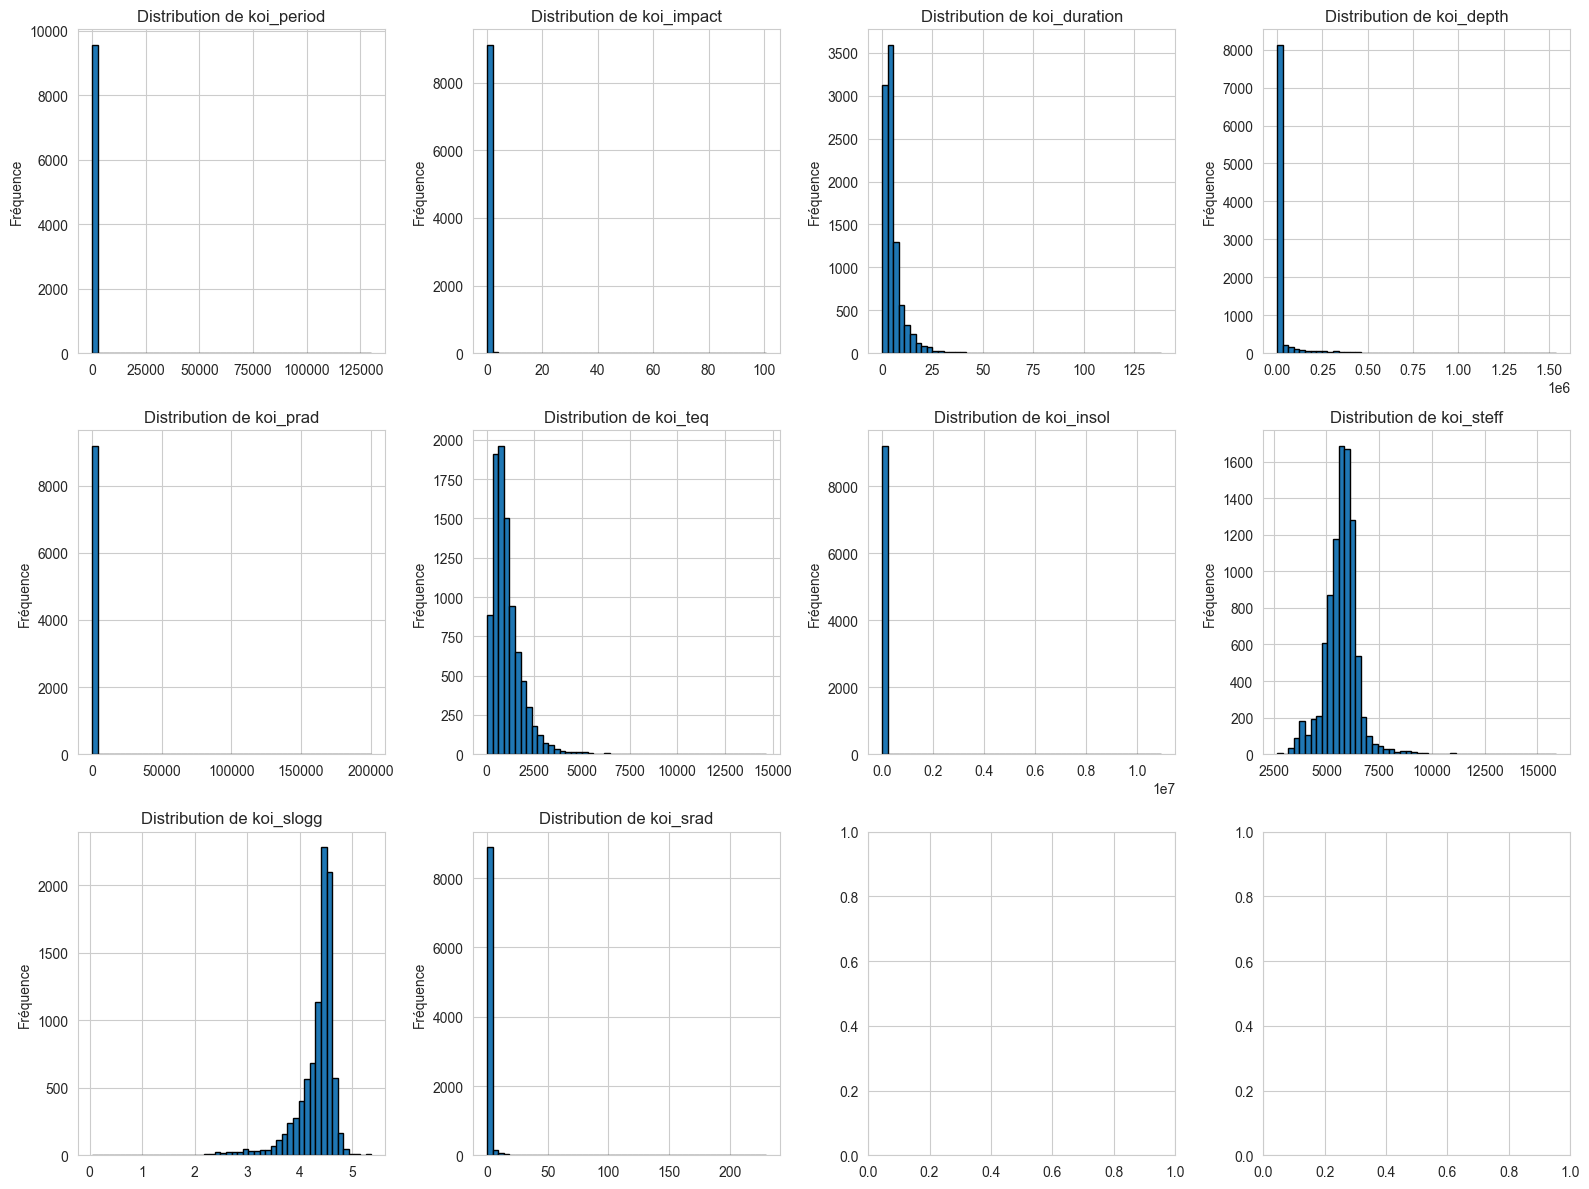

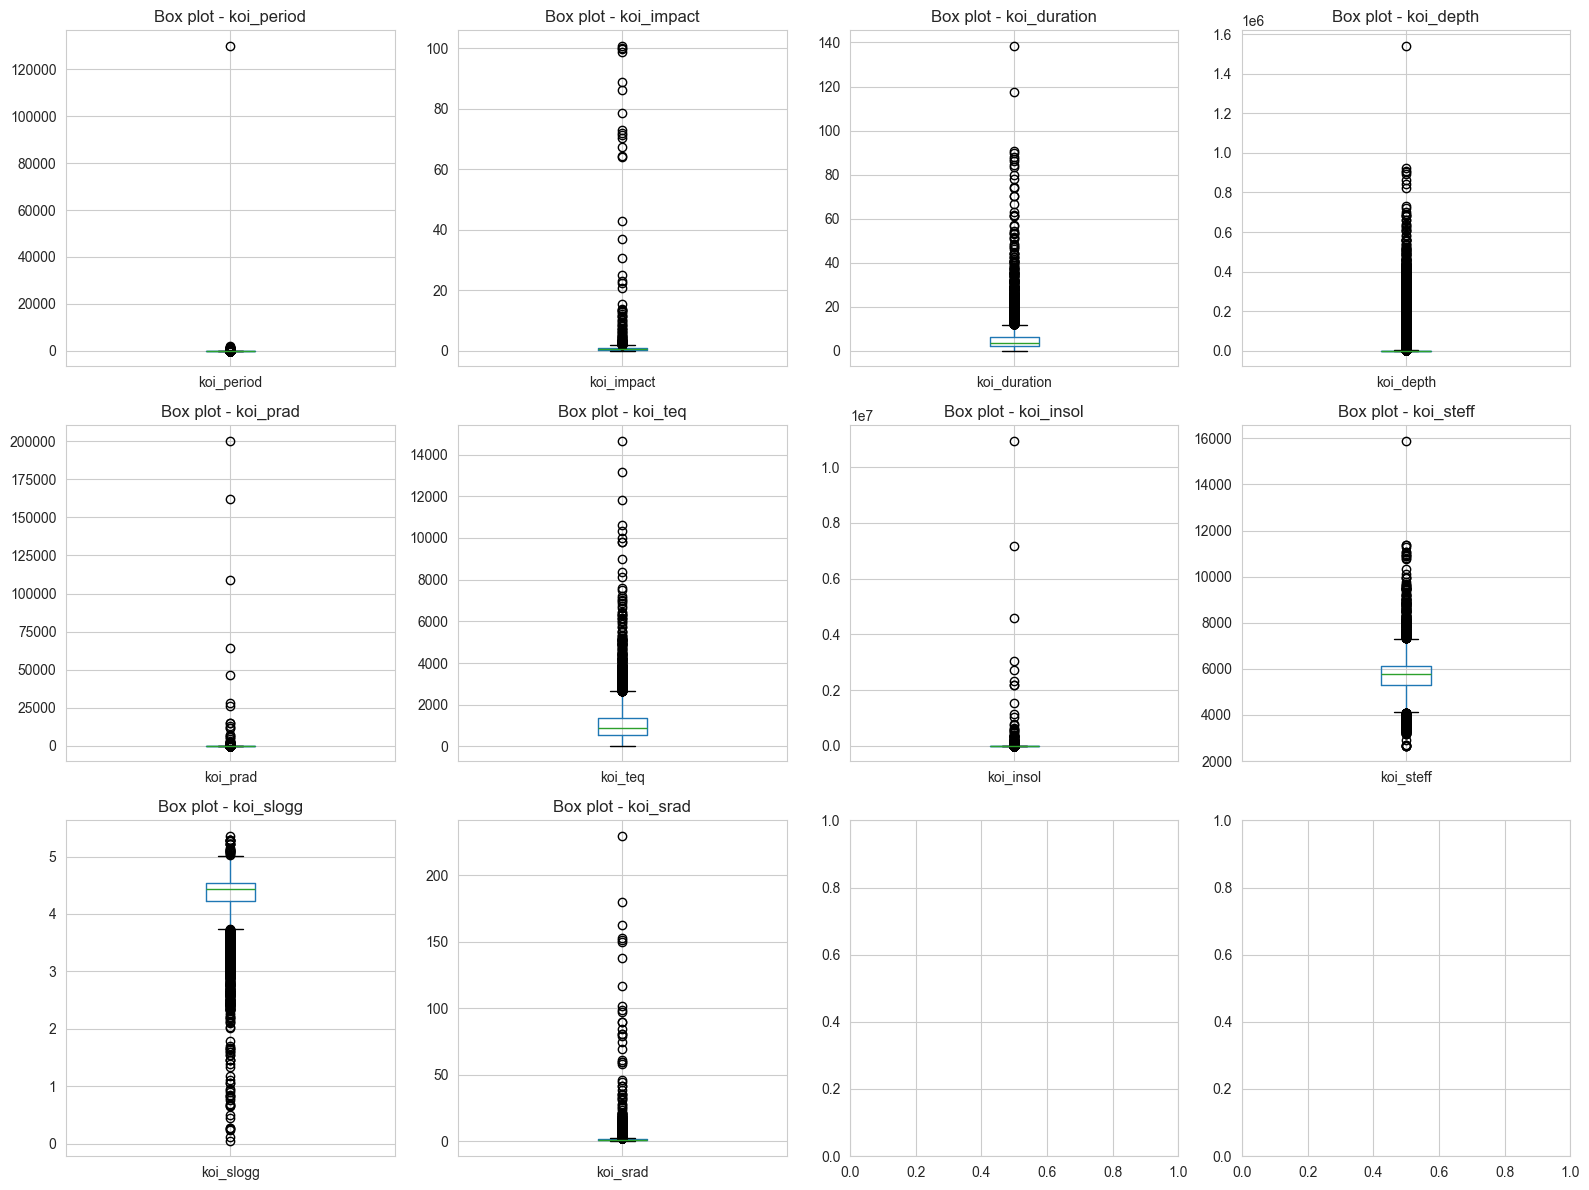

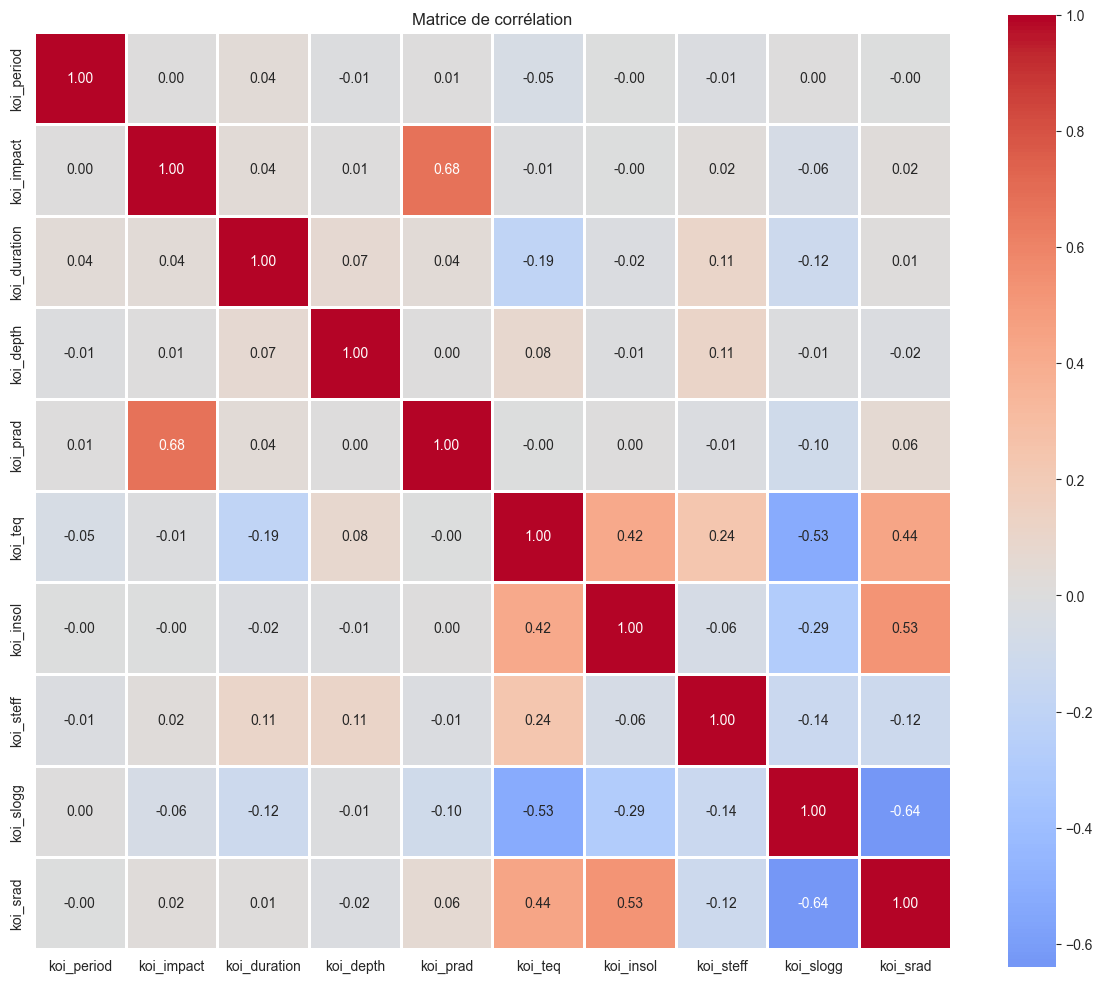

<Figure size 1000x600 with 0 Axes>

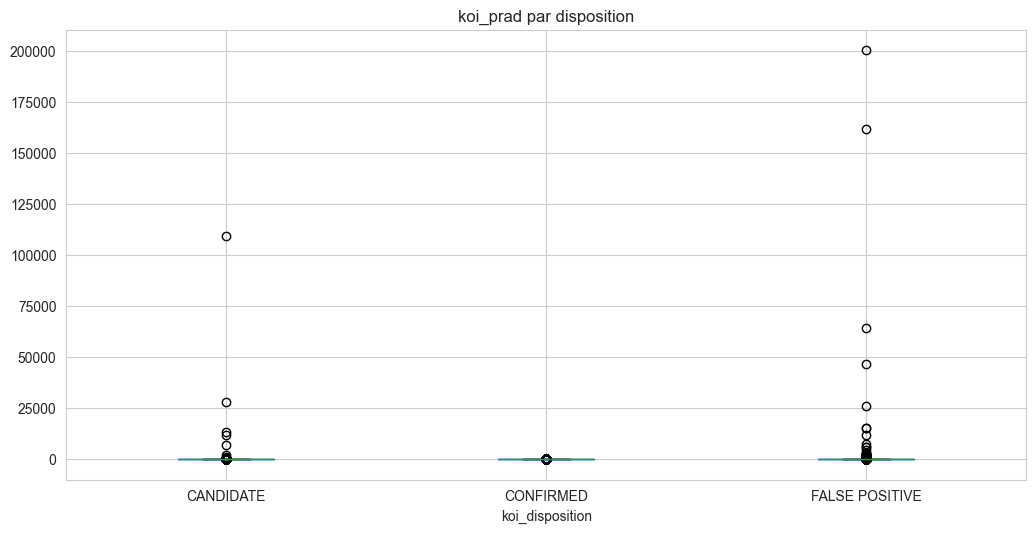

<Figure size 1000x600 with 0 Axes>

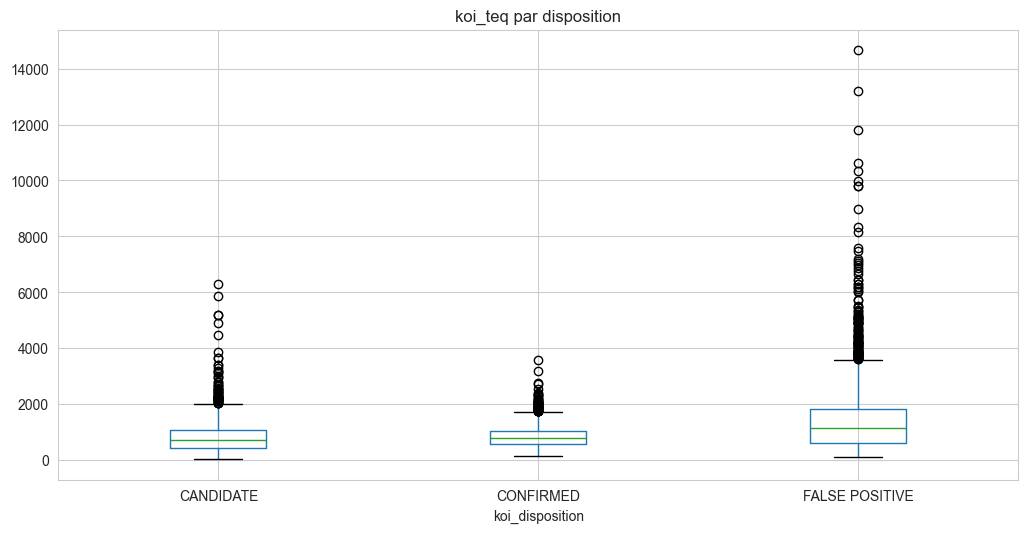

<Figure size 1000x600 with 0 Axes>

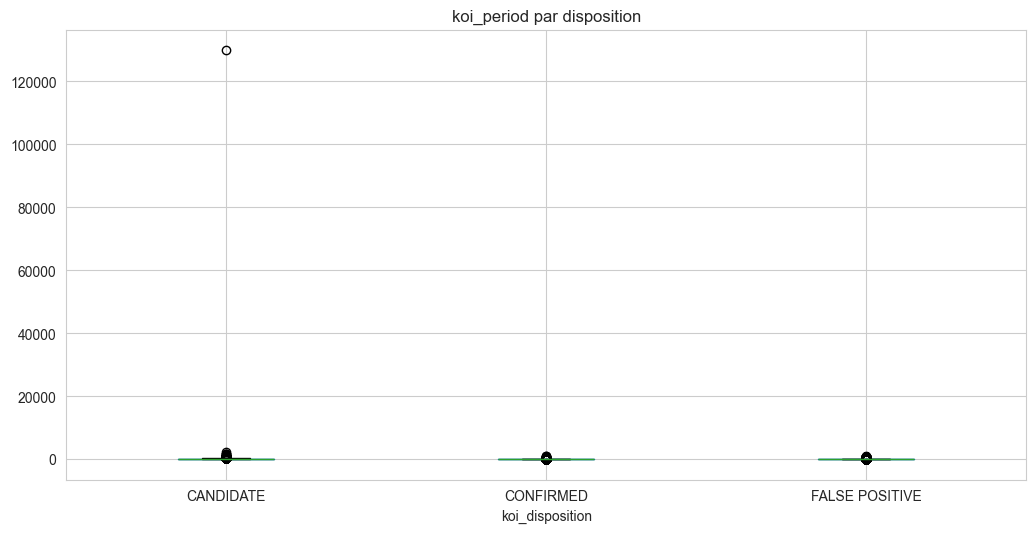

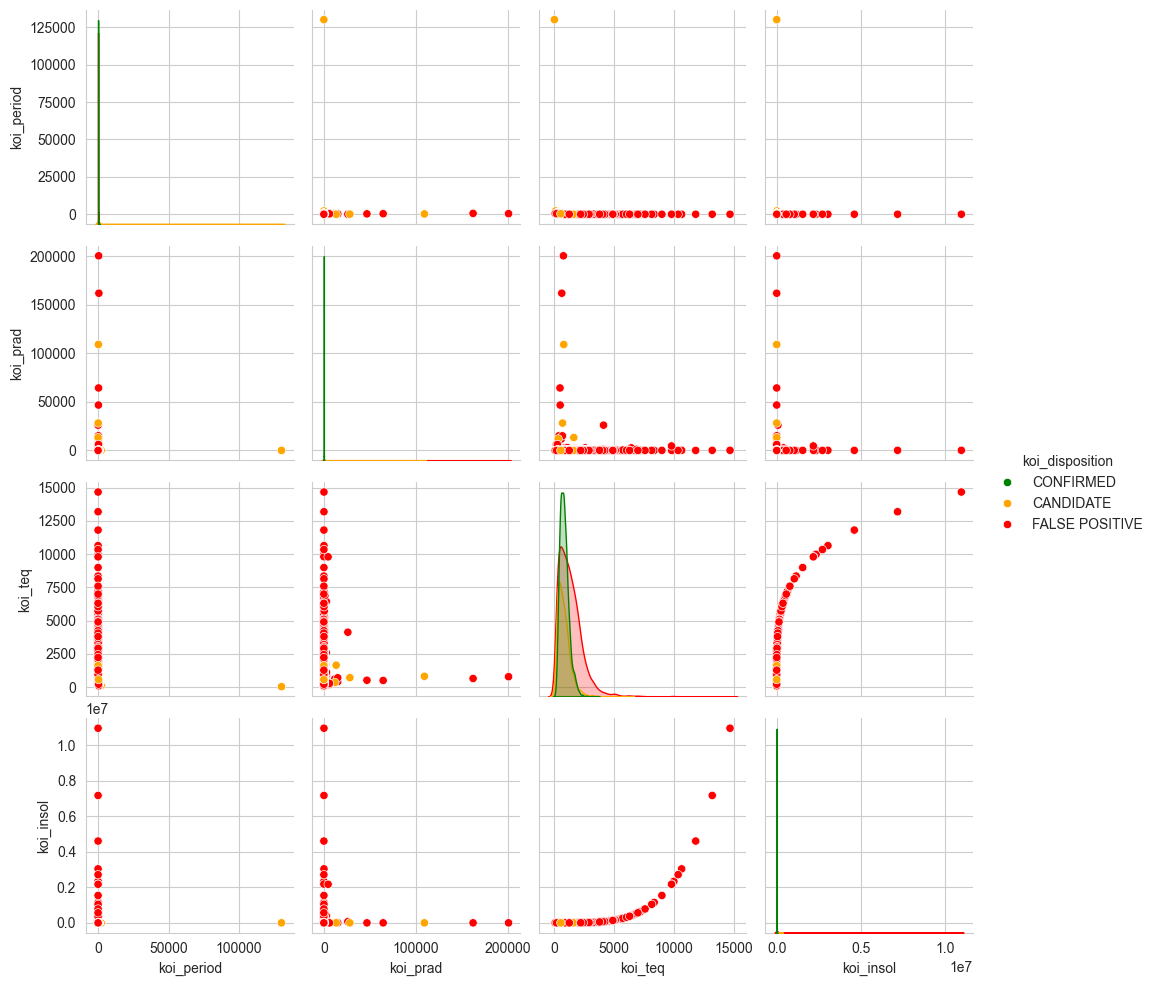


✅ ANALYSE TERMINÉE!

📌 PROCHAINES ÉTAPES:
1. Gérer les valeurs manquantes
2. Traiter les outliers
3. Feature engineering
4. Préparation pour ML


In [2]:
# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. CHARGEMENT DES DONNÉES
df = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_filtered.csv')

print("📊 APERÇU DU DATASET")
print(f"Shape: {df.shape}")
print(f"\nPremières lignes:")
print(df.head())

# 2. INFORMATIONS GÉNÉRALES
print("\n📋 INFO")
print(df.info())

print("\n📈 STATISTIQUES")
print(df.describe())

# 3. DISTRIBUTION DE LA TARGET
print("\n🎯 DISTRIBUTION DE koi_disposition")
print(df['koi_disposition'].value_counts())
print("\nPourcentages:")
print(df['koi_disposition'].value_counts(normalize=True) * 100)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['koi_disposition'].value_counts().plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Distribution des classes')
plt.ylabel('Nombre')

plt.subplot(1, 2, 2)
df['koi_disposition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition en %')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. VALEURS MANQUANTES
print("\n❓ VALEURS MANQUANTES")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Missing', ascending=False)
print(missing_df[missing_df['Missing'] > 0])

# Visualisation
plt.figure(figsize=(12, 6))
missing_df[missing_df['Missing'] > 0].plot(kind='barh', y='Percentage')
plt.title('Pourcentage de valeurs manquantes')
plt.xlabel('Pourcentage (%)')
plt.show()

# 5. COLONNES IMPORTANTES (sans erreurs)
important_cols = [
    'koi_period', 'koi_impact', 'koi_duration', 
    'koi_depth', 'koi_prad', 'koi_teq', 
    'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad'
]

# 6. DISTRIBUTIONS
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(important_cols):
    df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# 7. BOX PLOTS (outliers)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(important_cols):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Box plot - {col}')

plt.tight_layout()
plt.show()

# 8. CORRÉLATIONS
plt.figure(figsize=(12, 10))
corr = df[important_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

# 9. COMPARAISON PAR CLASSE
for col in ['koi_prad', 'koi_teq', 'koi_period']:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col, by='koi_disposition')
    plt.suptitle('')
    plt.title(f'{col} par disposition')
    plt.show()

# 10. PAIRPLOT (échantillon)
sample_cols = ['koi_period', 'koi_prad', 'koi_teq', 
               'koi_insol', 'koi_disposition']
sns.pairplot(df[sample_cols], hue='koi_disposition', 
             palette={'CONFIRMED': 'green', 
                     'FALSE POSITIVE': 'red', 
                     'CANDIDATE': 'orange'})
plt.show()

print("\n✅ ANALYSE TERMINÉE!")
print("\n📌 PROCHAINES ÉTAPES:")
print("1. Gérer les valeurs manquantes")
print("2. Traiter les outliers")
print("3. Feature engineering")
print("4. Préparation pour ML")


ANALYSE DES COLONNES koi_steff

1. INFORMATIONS GÉNÉRALES
------------------------------------------------------------
Nombre total de lignes: 9564

Aperçu des données:
   koi_steff  koi_steff_err1  koi_steff_err2
0     5455.0            81.0           -81.0
1     5455.0            81.0           -81.0
2     5853.0           158.0          -176.0
3     5805.0           157.0          -174.0
4     6031.0           169.0          -211.0
5     6046.0           189.0          -232.0
6     6046.0           189.0          -232.0
7     6046.0           189.0          -232.0
8     6227.0           111.0          -124.0
9     5031.0            75.0           -83.0


2. ANALYSE DES VALEURS MANQUANTES
------------------------------------------------------------
                Valeurs manquantes  Pourcentage (%)
koi_steff                      363             3.80
koi_steff_err1                 468             4.89
koi_steff_err2                 483             5.05


3. STATISTIQUES DESCRIPTIVES


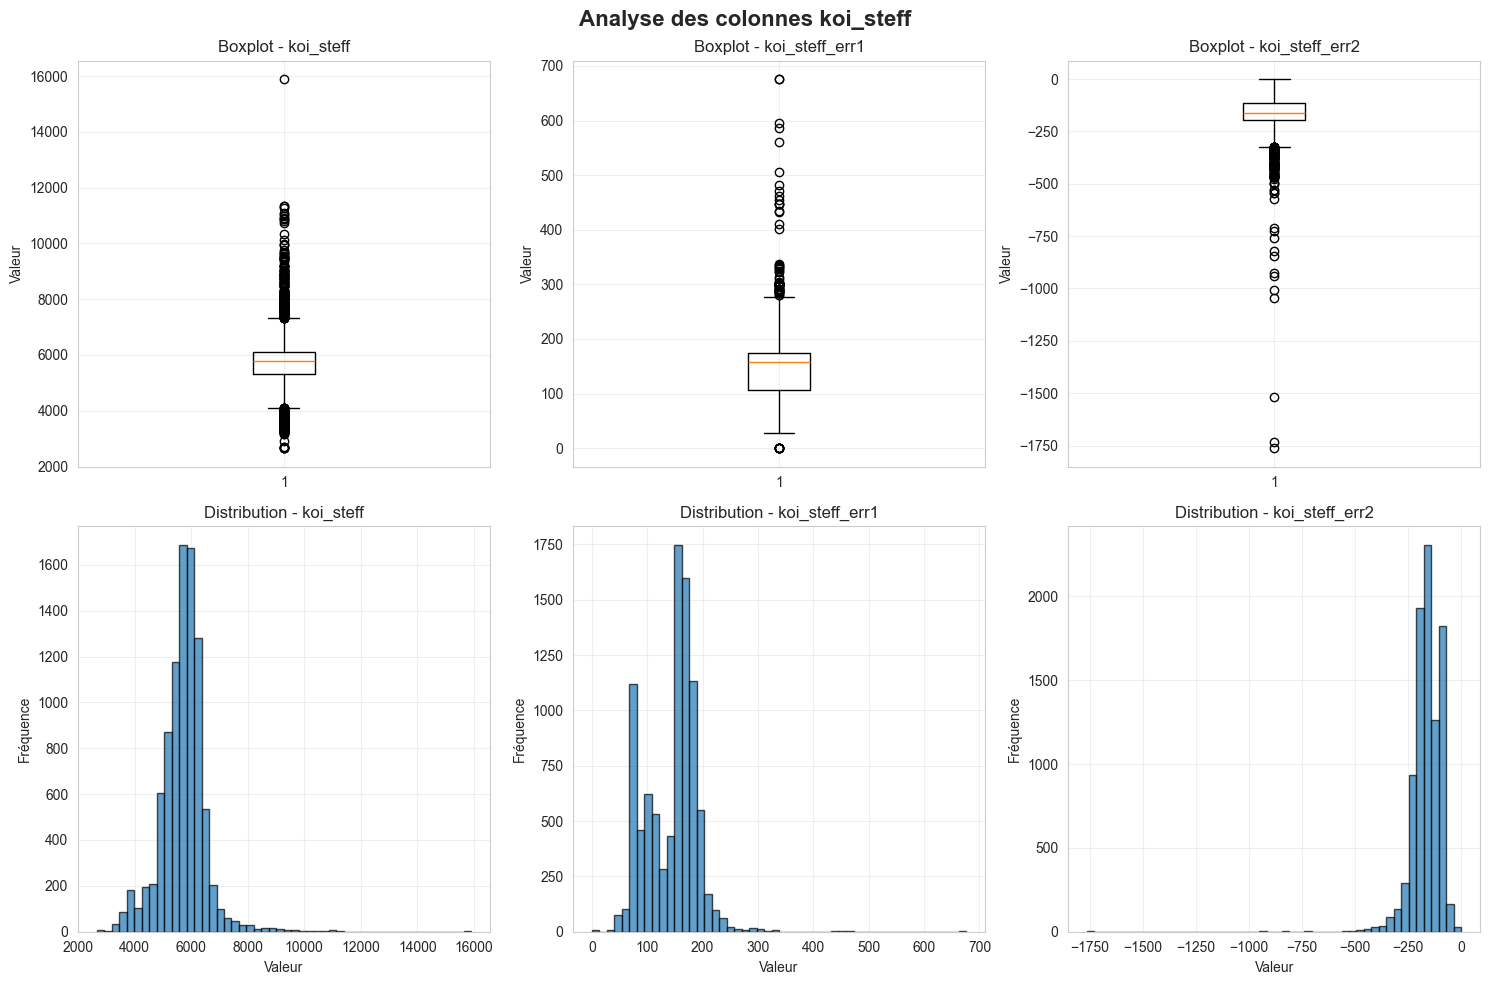

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_filtered.csv')

# Extraire les colonnes d'intérêt
colonnes = ['koi_steff', 'koi_steff_err1', 'koi_steff_err2']
df_steff = df[colonnes].copy()

print("=" * 60)
print("ANALYSE DES COLONNES koi_steff")
print("=" * 60)

# 1. Informations générales
print("\n1. INFORMATIONS GÉNÉRALES")
print("-" * 60)
print(f"Nombre total de lignes: {len(df_steff)}")
print(f"\nAperçu des données:")
print(df_steff.head(10))

# 2. Analyse des valeurs manquantes
print("\n\n2. ANALYSE DES VALEURS MANQUANTES")
print("-" * 60)
missing = df_steff.isnull().sum()
missing_pct = (df_steff.isnull().sum() / len(df_steff)) * 100

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct.round(2)
})
print(missing_df)

# 3. Statistiques descriptives
print("\n\n3. STATISTIQUES DESCRIPTIVES")
print("-" * 60)
print(df_steff.describe())

# 4. Détection des outliers (méthode IQR)
print("\n\n4. DÉTECTION DES OUTLIERS (Méthode IQR)")
print("-" * 60)

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers, lower_bound, upper_bound

for col in colonnes:
    data_non_null = df_steff[col].dropna()
    if len(data_non_null) > 0:
        outliers, lower, upper = detect_outliers_iqr(data_non_null)
        n_outliers = outliers.sum()
        pct_outliers = (n_outliers / len(data_non_null)) * 100
        
        print(f"\n{col}:")
        print(f"  Limites: [{lower:.2f}, {upper:.2f}]")
        print(f"  Nombre d'outliers: {n_outliers} ({pct_outliers:.2f}%)")
        print(f"  Min: {data_non_null.min():.2f}, Max: {data_non_null.max():.2f}")

# 5. Visualisations
print("\n\n5. GÉNÉRATION DES VISUALISATIONS")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Analyse des colonnes koi_steff', fontsize=16, fontweight='bold')

# Boxplots
for i, col in enumerate(colonnes):
    axes[0, i].boxplot(df_steff[col].dropna(), vert=True)
    axes[0, i].set_title(f'Boxplot - {col}')
    axes[0, i].set_ylabel('Valeur')
    axes[0, i].grid(True, alpha=0.3)

# Histogrammes
for i, col in enumerate(colonnes):
    axes[1, i].hist(df_steff[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[1, i].set_title(f'Distribution - {col}')
    axes[1, i].set_xlabel('Valeur')
    axes[1, i].set_ylabel('Fréquence')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('kepler_steff_analysis.png', dpi=300, bbox_inches='tight')
print("Visualisations sauvegardées dans 'kepler_steff_analysis.png'")

# 6. Résumé des outliers
print("\n\n6. RÉSUMÉ DES OUTLIERS DÉTECTÉS")
print("-" * 60)
for col in colonnes:
    data = df_steff[col].dropna()
    if len(data) > 0:
        outliers, lower, upper = detect_outliers_iqr(data)
        outlier_values = data[outliers]
        if len(outlier_values) > 0:
            print(f"\n{col}:")
            print(f"  {len(outlier_values)} outliers détectés")
            print(f"  Valeurs extrêmes: Min={outlier_values.min():.2f}, Max={outlier_values.max():.2f}")

print("\n" + "=" * 60)
print("ANALYSE TERMINÉE")
print("=" * 60)

ANALYSE DES COLONNES koi_srad

1. INFORMATIONS GÉNÉRALES
------------------------------------------------------------
Nombre total de lignes: 9564

Aperçu des données:
   koi_srad  koi_srad_err1  koi_srad_err2
0     0.927          0.105         -0.061
1     0.927          0.105         -0.061
2     0.868          0.233         -0.078
3     0.791          0.201         -0.067
4     1.046          0.334         -0.133
5     0.972          0.315         -0.105
6     0.972          0.315         -0.105
7     0.972          0.315         -0.105
8     1.958          0.322         -0.483
9     0.848          0.033         -0.072


2. ANALYSE DES VALEURS MANQUANTES
------------------------------------------------------------
               Valeurs manquantes  Pourcentage (%)
koi_srad                      363             3.80
koi_srad_err1                 468             4.89
koi_srad_err2                 468             4.89


3. STATISTIQUES DESCRIPTIVES
--------------------------------------

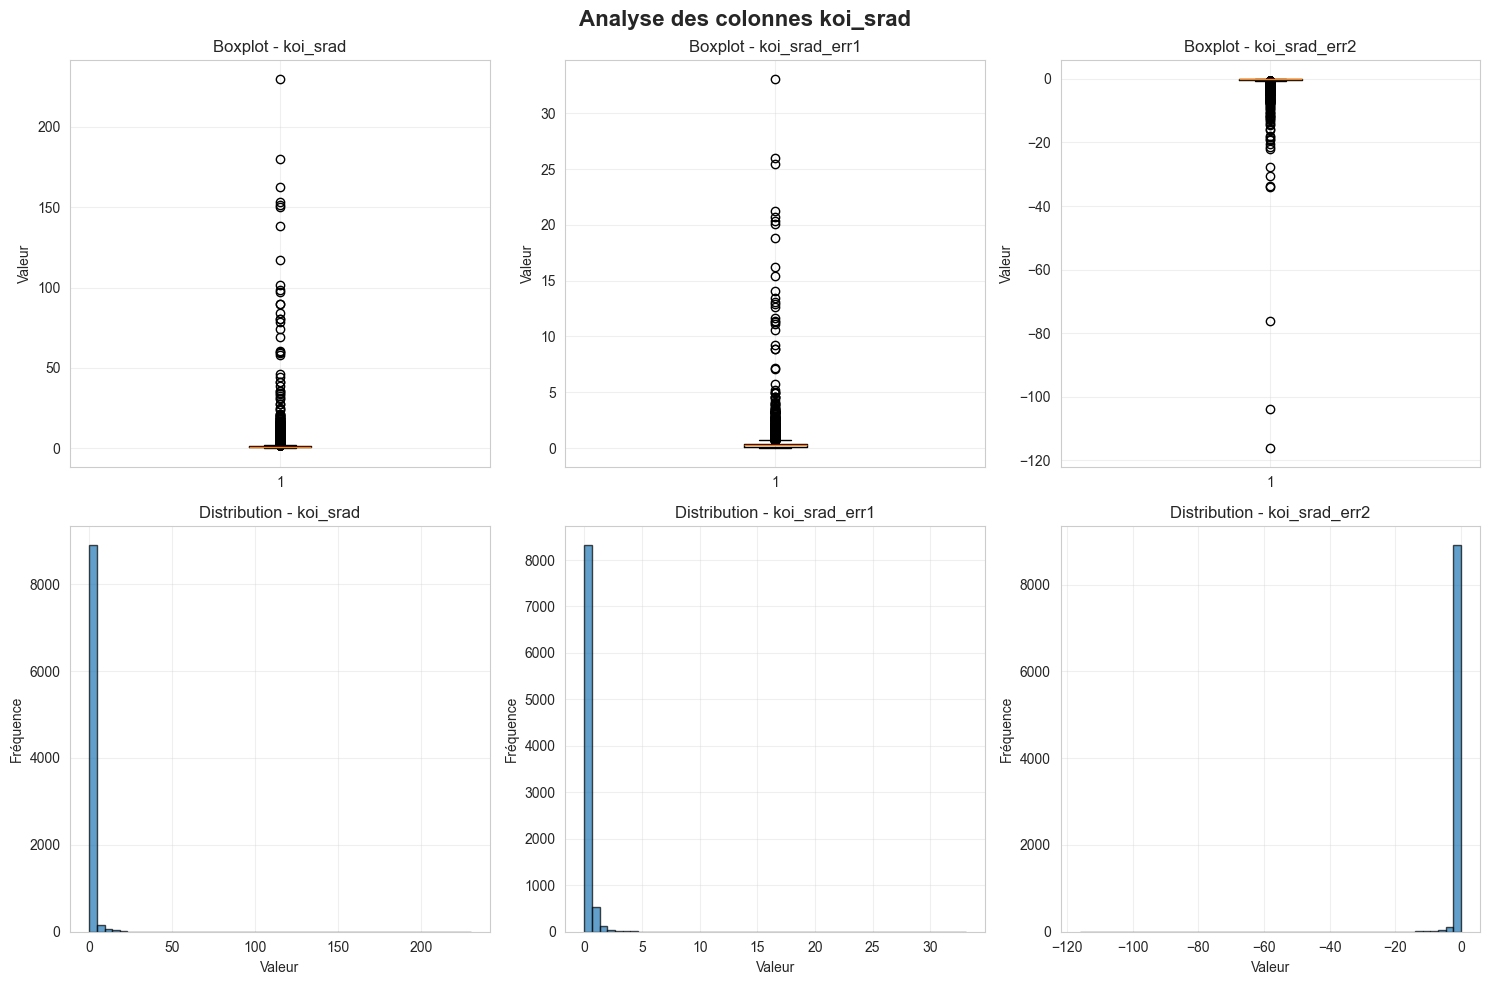

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_filtered.csv')

# Extraire les colonnes d'intérêt
colonnes = ['koi_srad', 'koi_srad_err1', 'koi_srad_err2']
df_srad = df[colonnes].copy()

print("=" * 60)
print("ANALYSE DES COLONNES koi_srad")
print("=" * 60)

# 1. Informations générales
print("\n1. INFORMATIONS GÉNÉRALES")
print("-" * 60)
print(f"Nombre total de lignes: {len(df_srad)}")
print(f"\nAperçu des données:")
print(df_srad.head(10))

# 2. Analyse des valeurs manquantes
print("\n\n2. ANALYSE DES VALEURS MANQUANTES")
print("-" * 60)
missing = df_srad.isnull().sum()
missing_pct = (df_srad.isnull().sum() / len(df_srad)) * 100

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct.round(2)
})
print(missing_df)

# 3. Statistiques descriptives
print("\n\n3. STATISTIQUES DESCRIPTIVES")
print("-" * 60)
print(df_srad.describe())

# 4. Détection des outliers (méthode IQR)
print("\n\n4. DÉTECTION DES OUTLIERS (Méthode IQR)")
print("-" * 60)

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers, lower_bound, upper_bound

for col in colonnes:
    data_non_null = df_srad[col].dropna()
    if len(data_non_null) > 0:
        outliers, lower, upper = detect_outliers_iqr(data_non_null)
        n_outliers = outliers.sum()
        pct_outliers = (n_outliers / len(data_non_null)) * 100
        
        print(f"\n{col}:")
        print(f"  Limites: [{lower:.2f}, {upper:.2f}]")
        print(f"  Nombre d'outliers: {n_outliers} ({pct_outliers:.2f}%)")
        print(f"  Min: {data_non_null.min():.2f}, Max: {data_non_null.max():.2f}")

# 5. Visualisations
print("\n\n5. GÉNÉRATION DES VISUALISATIONS")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Analyse des colonnes koi_srad', fontsize=16, fontweight='bold')

# Boxplots
for i, col in enumerate(colonnes):
    axes[0, i].boxplot(df_srad[col].dropna(), vert=True)
    axes[0, i].set_title(f'Boxplot - {col}')
    axes[0, i].set_ylabel('Valeur')
    axes[0, i].grid(True, alpha=0.3)

# Histogrammes
for i, col in enumerate(colonnes):
    axes[1, i].hist(df_srad[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[1, i].set_title(f'Distribution - {col}')
    axes[1, i].set_xlabel('Valeur')
    axes[1, i].set_ylabel('Fréquence')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Kepler_srad_analysis.png', dpi=300, bbox_inches='tight')
print("Visualisations sauvegardées dans 'kepler_srad_analysis.png'")

# 6. Résumé des outliers
print("\n\n6. RÉSUMÉ DES OUTLIERS DÉTECTÉS")
print("-" * 60)
for col in colonnes:
    data = df_srad[col].dropna()
    if len(data) > 0:
        outliers, lower, upper = detect_outliers_iqr(data)
        outlier_values = data[outliers]
        if len(outlier_values) > 0:
            print(f"\n{col}:")
            print(f"  {len(outlier_values)} outliers détectés")
            print(f"  Valeurs extrêmes: Min={outlier_values.min():.2f}, Max={outlier_values.max():.2f}")

print("\n" + "=" * 60)
print("ANALYSE TERMINÉE")
print("=" * 60)

ANALYSE DES COLONNES koi_slogg

1. INFORMATIONS GÉNÉRALES
------------------------------------------------------------
Nombre total de lignes: 9564

Aperçu des données:
   koi_slogg  koi_slogg_err1  koi_slogg_err2
0      4.467           0.064          -0.096
1      4.467           0.064          -0.096
2      4.544           0.044          -0.176
3      4.564           0.053          -0.168
4      4.438           0.070          -0.210
5      4.486           0.054          -0.229
6      4.486           0.054          -0.229
7      4.486           0.054          -0.229
8      3.986           0.182          -0.098
9      4.485           0.083          -0.028


2. ANALYSE DES VALEURS MANQUANTES
------------------------------------------------------------
                Valeurs manquantes  Pourcentage (%)
koi_slogg                      363             3.80
koi_slogg_err1                 468             4.89
koi_slogg_err2                 468             4.89


3. STATISTIQUES DESCRIPTIVES


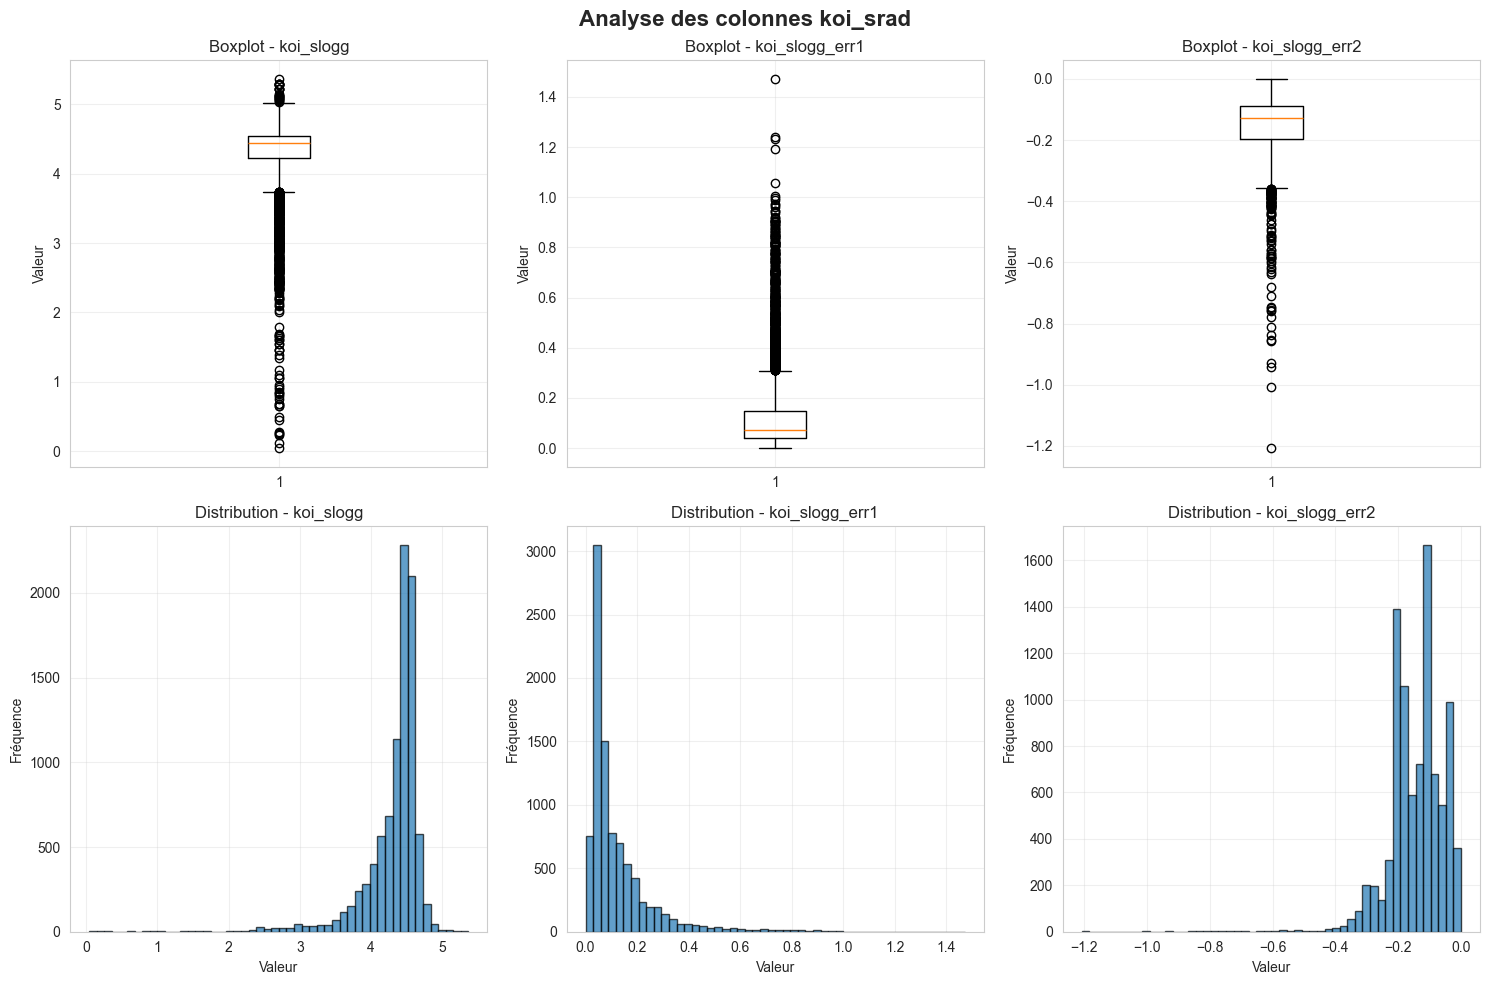

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_filtered.csv')

# Extraire les colonnes d'intérêt
colonnes = ['koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2']
df_insol = df[colonnes].copy()

print("=" * 60)
print("ANALYSE DES COLONNES koi_slogg")
print("=" * 60)

# 1. Informations générales
print("\n1. INFORMATIONS GÉNÉRALES")
print("-" * 60)
print(f"Nombre total de lignes: {len(df_insol)}")
print(f"\nAperçu des données:")
print(df_insol.head(10))

# 2. Analyse des valeurs manquantes
print("\n\n2. ANALYSE DES VALEURS MANQUANTES")
print("-" * 60)
missing = df_insol.isnull().sum()
missing_pct = (df_insol.isnull().sum() / len(df_insol)) * 100

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct.round(2)
})
print(missing_df)

# 3. Statistiques descriptives
print("\n\n3. STATISTIQUES DESCRIPTIVES")
print("-" * 60)
print(df_insol.describe())

# 4. Détection des outliers (méthode IQR)
print("\n\n4. DÉTECTION DES OUTLIERS (Méthode IQR)")
print("-" * 60)

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers, lower_bound, upper_bound

for col in colonnes:
    data_non_null = df_insol[col].dropna()
    if len(data_non_null) > 0:
        outliers, lower, upper = detect_outliers_iqr(data_non_null)
        n_outliers = outliers.sum()
        pct_outliers = (n_outliers / len(data_non_null)) * 100
        
        print(f"\n{col}:")
        print(f"  Limites: [{lower:.2f}, {upper:.2f}]")
        print(f"  Nombre d'outliers: {n_outliers} ({pct_outliers:.2f}%)")
        print(f"  Min: {data_non_null.min():.2f}, Max: {data_non_null.max():.2f}")

# 5. Visualisations
print("\n\n5. GÉNÉRATION DES VISUALISATIONS")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Analyse des colonnes koi_srad', fontsize=16, fontweight='bold')

# Boxplots
for i, col in enumerate(colonnes):
    axes[0, i].boxplot(df_insol[col].dropna(), vert=True)
    axes[0, i].set_title(f'Boxplot - {col}')
    axes[0, i].set_ylabel('Valeur')
    axes[0, i].grid(True, alpha=0.3)

# Histogrammes
for i, col in enumerate(colonnes):
    axes[1, i].hist(df_insol[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[1, i].set_title(f'Distribution - {col}')
    axes[1, i].set_xlabel('Valeur')
    axes[1, i].set_ylabel('Fréquence')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Kepler_slogg_analysis.png', dpi=300, bbox_inches='tight')
print("Visualisations sauvegardées dans 'kepler_slogg_analysis.png'")

# 6. Résumé des outliers
print("\n\n6. RÉSUMÉ DES OUTLIERS DÉTECTÉS")
print("-" * 60)
for col in colonnes:
    data = df_insol[col].dropna()
    if len(data) > 0:
        outliers, lower, upper = detect_outliers_iqr(data)
        outlier_values = data[outliers]
        if len(outlier_values) > 0:
            print(f"\n{col}:")
            print(f"  {len(outlier_values)} outliers détectés")
            print(f"  Valeurs extrêmes: Min={outlier_values.min():.2f}, Max={outlier_values.max():.2f}")

print("\n" + "=" * 60)
print("ANALYSE TERMINÉE")
print("=" * 60)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_filtered.csv')

# Extraire les colonnes d'intérêt
colonnes = ['koi_insol', 'koi_insol_err1', 'koi_insol_err2']
df_insol = df[colonnes].copy()

print("=" * 60)
print("ANALYSE DES COLONNES koi_insol")
print("=" * 60)

# 1. Informations générales
print("\n1. INFORMATIONS GÉNÉRALES")
print("-" * 60)
print(f"Nombre total de lignes: {len(df_insol)}")
print(f"\nAperçu des données:")
print(df_insol.head(10))

# 2. Analyse des valeurs manquantes
print("\n\n2. ANALYSE DES VALEURS MANQUANTES")
print("-" * 60)
missing = df_insol.isnull().sum()
missing_pct = (df_insol.isnull().sum() / len(df_insol)) * 100

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct.round(2)
})
print(missing_df)

# 3. Statistiques descriptives
print("\n\n3. STATISTIQUES DESCRIPTIVES")
print("-" * 60)
print(df_insol.describe())

# 4. Détection des outliers (méthode IQR)
print("\n\n4. DÉTECTION DES OUTLIERS (Méthode IQR)")
print("-" * 60)

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers, lower_bound, upper_bound

for col in colonnes:
    data_non_null = df_insol[col].dropna()
    if len(data_non_null) > 0:
        outliers, lower, upper = detect_outliers_iqr(data_non_null)
        n_outliers = outliers.sum()
        pct_outliers = (n_outliers / len(data_non_null)) * 100
        
        print(f"\n{col}:")
        print(f"  Limites: [{lower:.2f}, {upper:.2f}]")
        print(f"  Nombre d'outliers: {n_outliers} ({pct_outliers:.2f}%)")
        print(f"  Min: {data_non_null.min():.2f}, Max: {data_non_null.max():.2f}")

# 5. Visualisations
print("\n\n5. GÉNÉRATION DES VISUALISATIONS")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Analyse des colonnes koi_insol', fontsize=16, fontweight='bold')

# Boxplots
for i, col in enumerate(colonnes):
    axes[0, i].boxplot(df_insol[col].dropna(), vert=True)
    axes[0, i].set_title(f'Boxplot - {col}')
    axes[0, i].set_ylabel('Valeur')
    axes[0, i].grid(True, alpha=0.3)

# Histogrammes
for i, col in enumerate(colonnes):
    axes[1, i].hist(df_insol[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[1, i].set_title(f'Distribution - {col}')
    axes[1, i].set_xlabel('Valeur')
    axes[1, i].set_ylabel('Fréquence')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Kepler_insol_analysis.png', dpi=300, bbox_inches='tight')
print("Visualisations sauvegardées dans 'kepler_insol_analysis.png'")

# 6. Résumé des outliers
print("\n\n6. RÉSUMÉ DES OUTLIERS DÉTECTÉS")
print("-" * 60)
for col in colonnes:
    data = df_insol[col].dropna()
    if len(data) > 0:
        outliers, lower, upper = detect_outliers_iqr(data)
        outlier_values = data[outliers]
        if len(outlier_values) > 0:
            print(f"\n{col}:")
            print(f"  {len(outlier_values)} outliers détectés")
            print(f"  Valeurs extrêmes: Min={outlier_values.min():.2f}, Max={outlier_values.max():.2f}")

print("\n" + "=" * 60)
print("ANALYSE TERMINÉE")
print("=" * 60)

# 01_EDA_TESS

📊 APERÇU DU DATASET
Shape: (7699, 33)

Premières lignes:
       toi        tid tfopwg_disp  pl_orbper  pl_orbpererr1  pl_orbpererr2  \
0  1000.01   50365310          FP   2.171348       0.000264      -0.000264   
1  1001.01   88863718          PC   1.931646       0.000005      -0.000005   
2  1002.01  124709665          FP   1.867557       0.000003      -0.000003   
3  1003.01  106997505          FP   2.743230       0.001080      -0.001080   
4  1004.01  238597883          FP   3.573014       0.000013      -0.000013   

   pl_trandurh  pl_trandurherr1  pl_trandurherr2   pl_trandep  ...  \
0      2.01722         0.319588        -0.319588   656.886099  ...   
1      3.16600         0.647000        -0.647000  1286.000000  ...   
2      1.40800         0.184000        -0.184000  1500.000000  ...   
3      3.16700         0.642000        -0.642000   383.410000  ...   
4      3.37000         1.029000        -1.029000   755.000000  ...   

   st_tmagerr2  st_teff  st_tefferr1  st_tefferr2  st

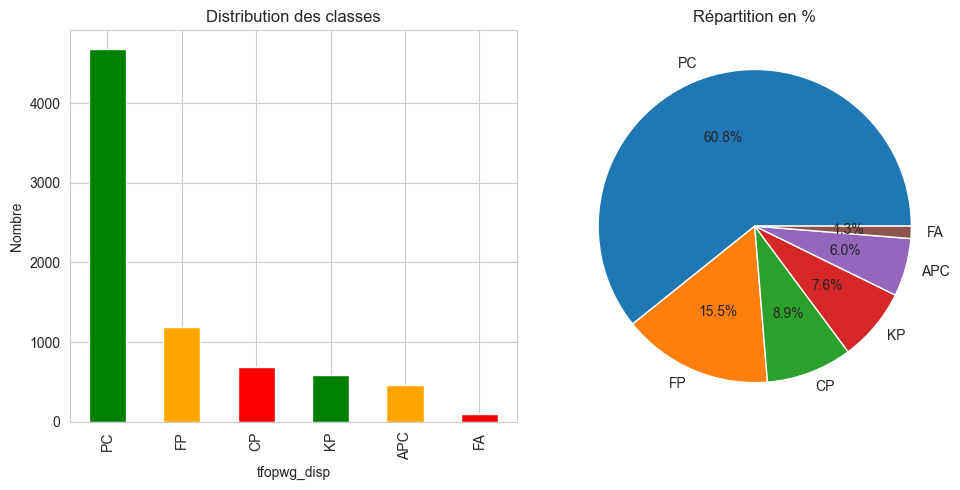


❓ VALEURS MANQUANTES
                 Missing  Percentage
pl_insolerr1        7699  100.000000
pl_insolerr2        7699  100.000000
pl_eqterr2          7699  100.000000
pl_eqterr1          7699  100.000000
st_loggerr2         2270   29.484349
st_loggerr1         2270   29.484349
st_raderr1          1962   25.483829
st_raderr2          1962   25.483829
pl_radeerr1         1623   21.080660
pl_radeerr2         1623   21.080660
st_logg              856   11.118327
st_rad               507    6.585271
pl_rade              506    6.572282
st_tefferr2          474    6.156644
st_tefferr1          474    6.156644
pl_eqt               311    4.039486
pl_insol             176    2.286011
st_teff              161    2.091181
pl_orbpererr2        131    1.701520
pl_orbpererr1        131    1.701520
pl_orbper            107    1.389791
pl_trandurherr2       13    0.168853
pl_trandurherr1       13    0.168853
pl_trandeperr2         6    0.077932
pl_trandeperr1         6    0.077932


<Figure size 1200x600 with 0 Axes>

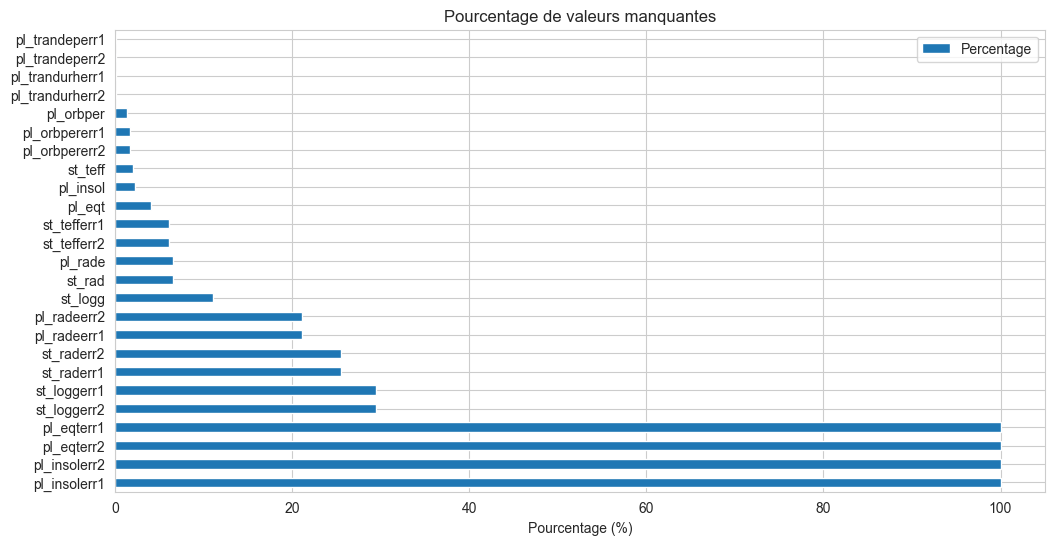

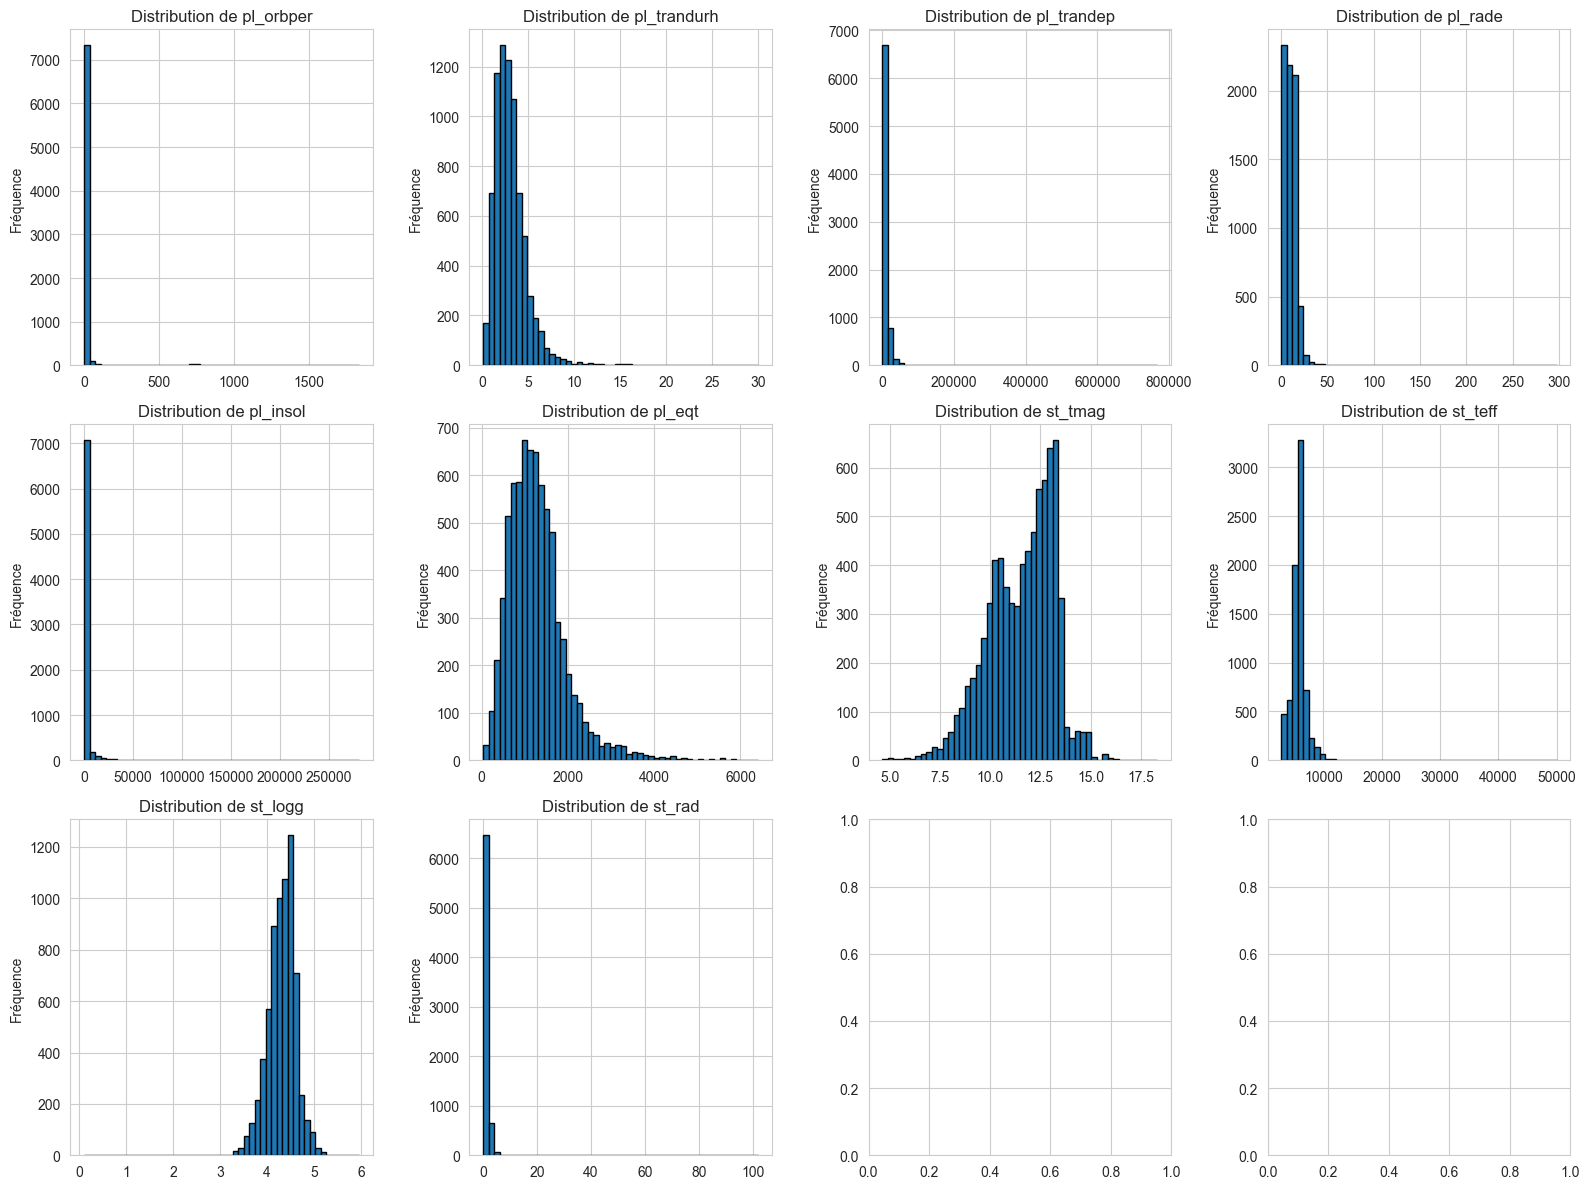

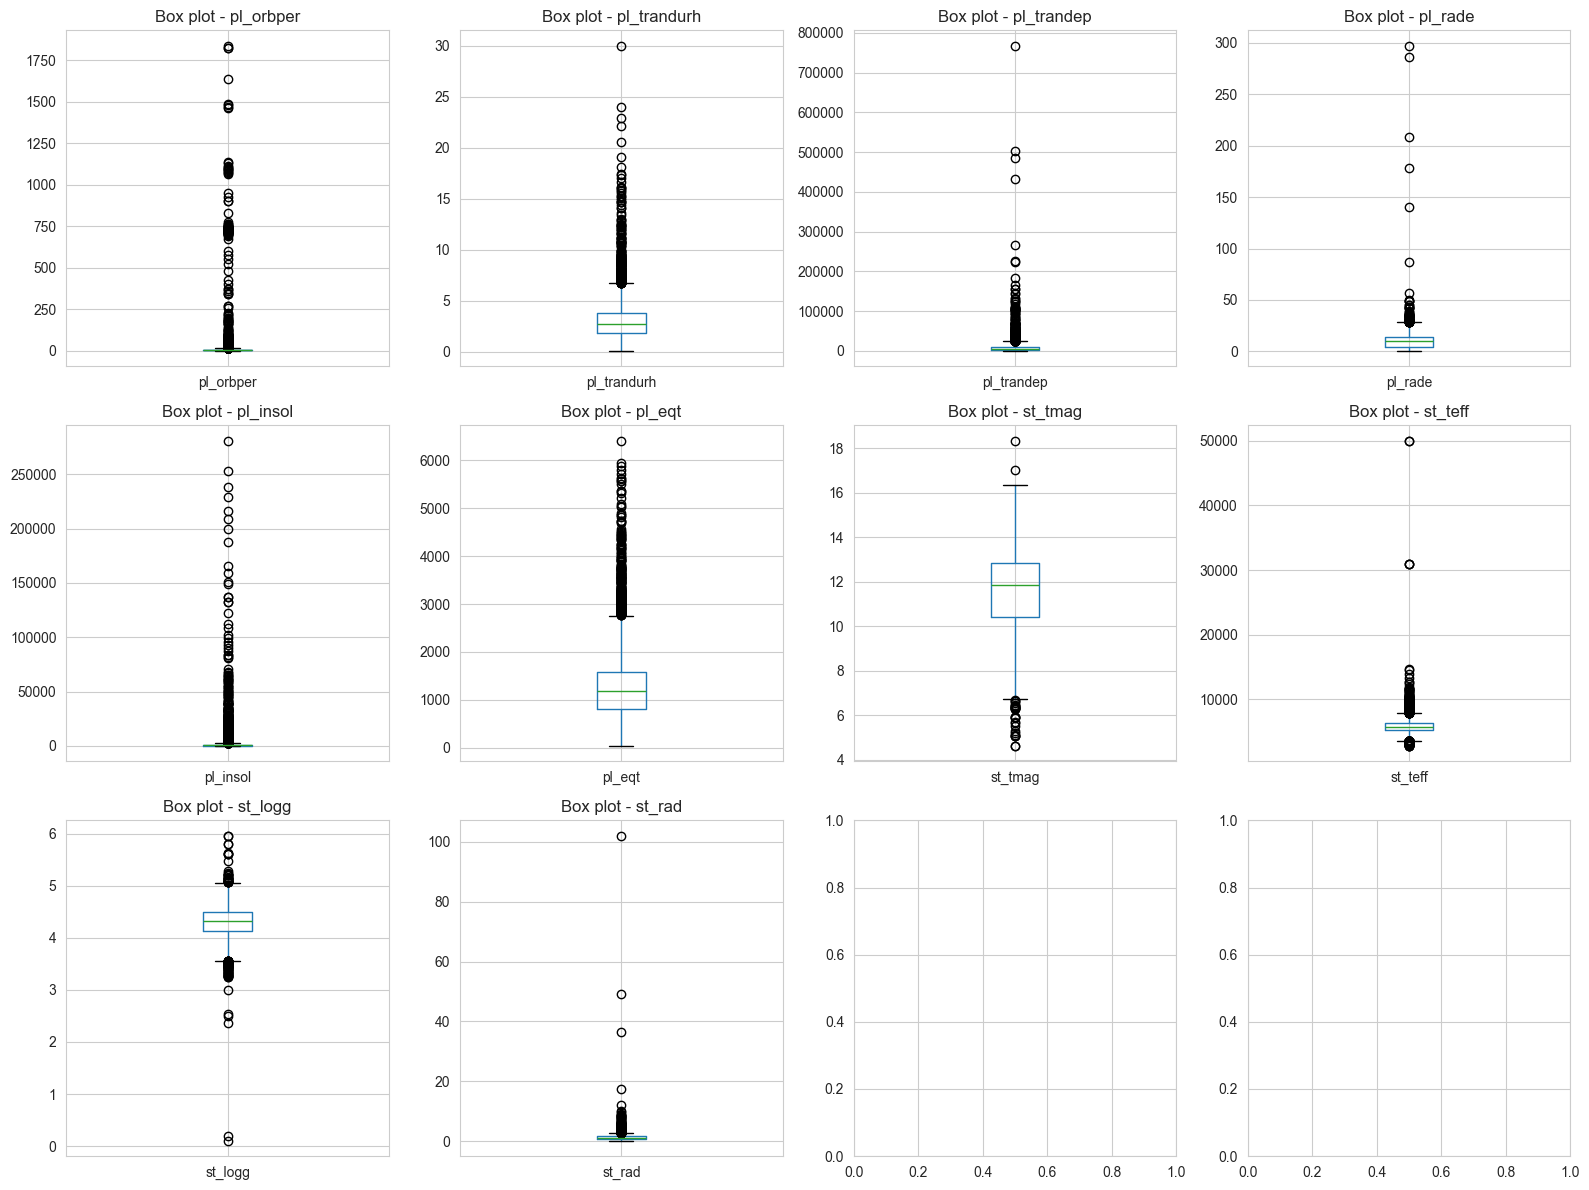

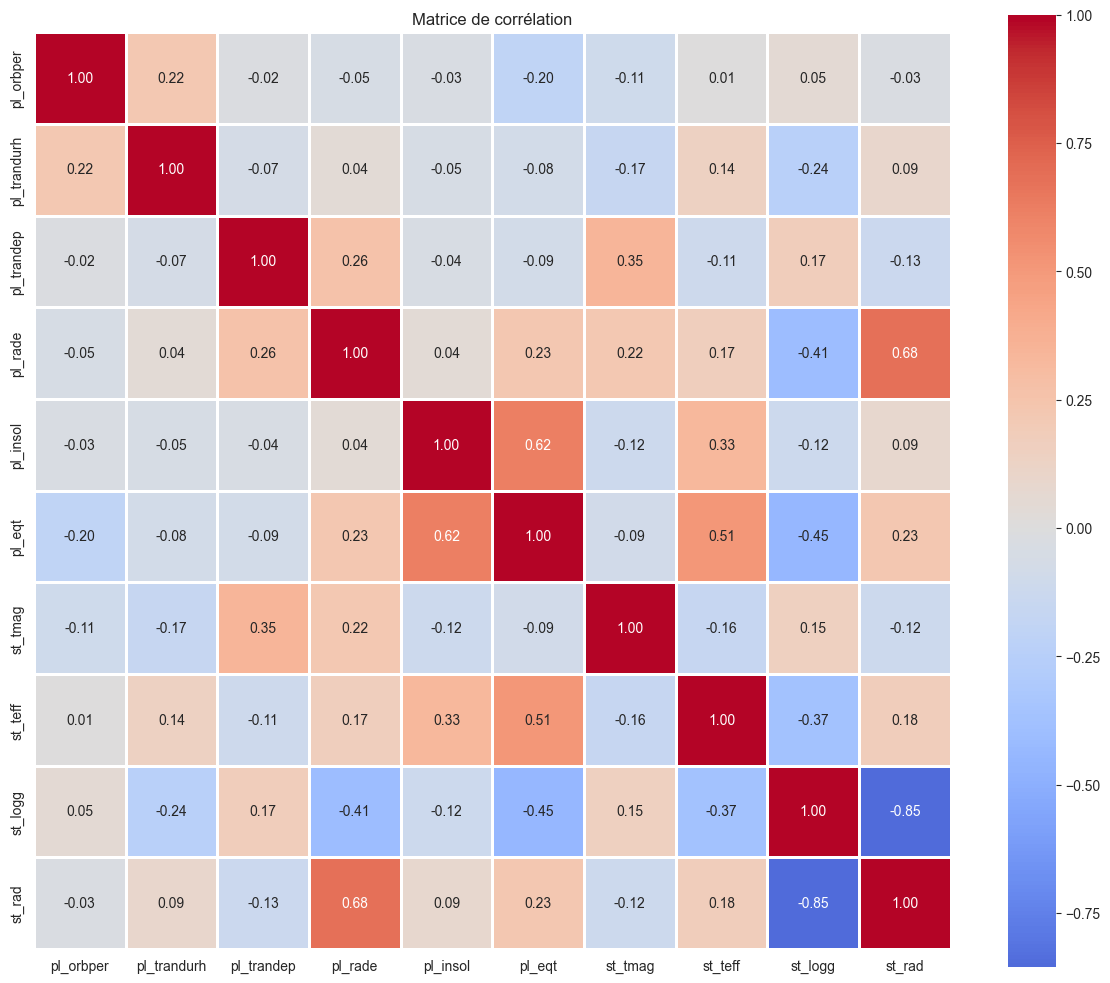

<Figure size 1000x600 with 0 Axes>

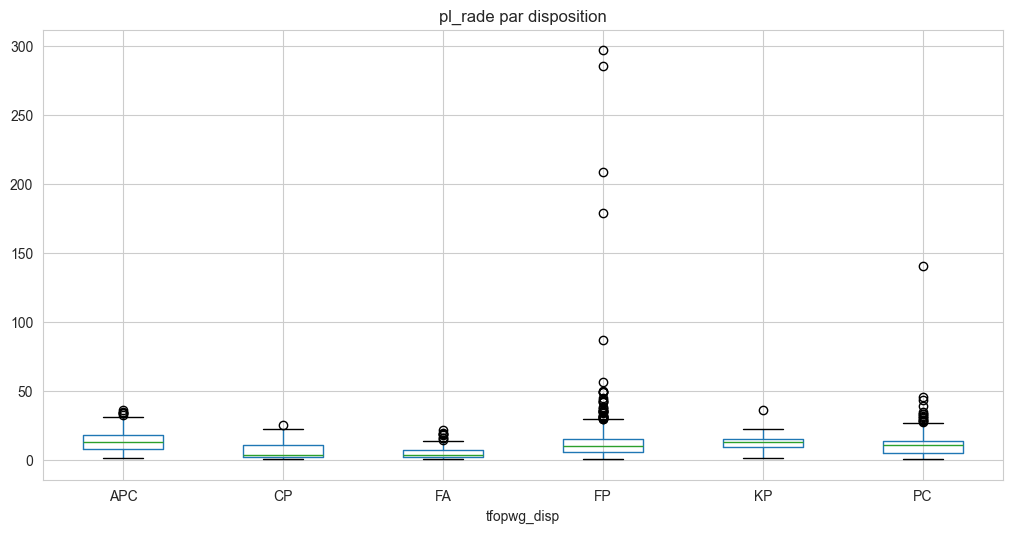

<Figure size 1000x600 with 0 Axes>

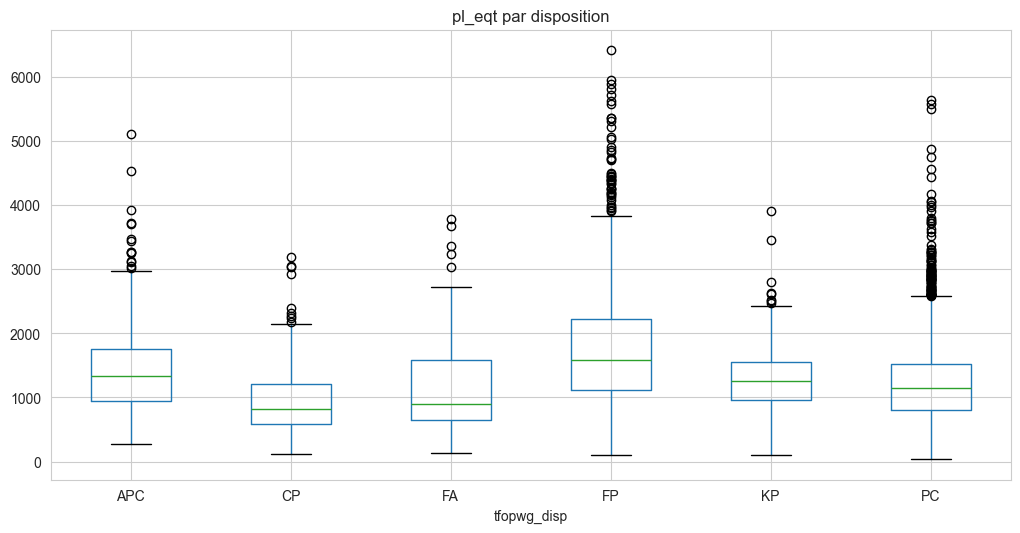

<Figure size 1000x600 with 0 Axes>

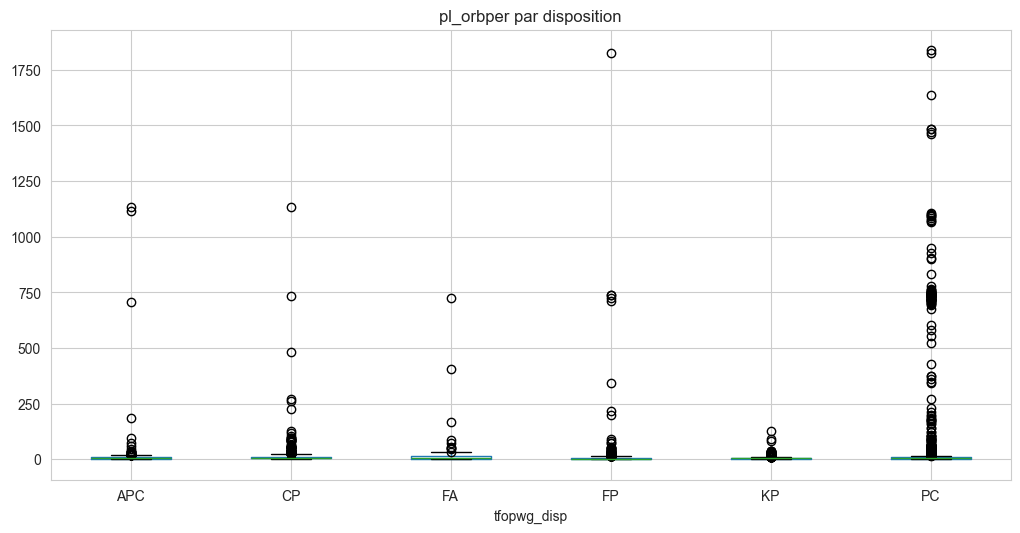

KeyError: 'PC'

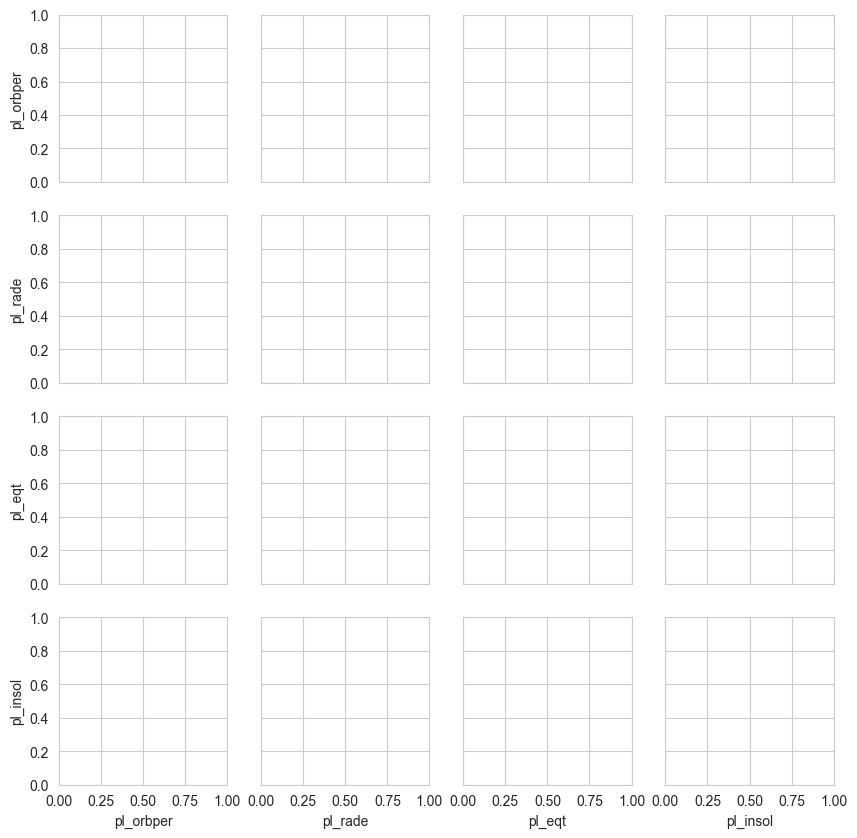

In [1]:
# ===============================
# 0. Importations
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ===============================
# 1. CHARGEMENT DES DONNÉES
# ===============================
df = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/TESS_filtered.csv')

print("📊 APERÇU DU DATASET")
print(f"Shape: {df.shape}")
print("\nPremières lignes:")
print(df.head())

# ===============================
# 2. INFORMATIONS GÉNÉRALES
# ===============================
print("\n📋 INFO")
print(df.info())

print("\n📈 STATISTIQUES")
print(df.describe())

# ===============================
# 3. DISTRIBUTION DE LA TARGET (tfopwg_disp)
# ===============================
print("\n🎯 DISTRIBUTION DE tfopwg_disp")
print(df['tfopwg_disp'].value_counts())
print("\nPourcentages:")
print(df['tfopwg_disp'].value_counts(normalize=True) * 100)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['tfopwg_disp'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution des classes')
plt.ylabel('Nombre')

plt.subplot(1, 2, 2)
df['tfopwg_disp'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition en %')
plt.ylabel('')
plt.tight_layout()
plt.show()

# ===============================
# 4. VALEURS MANQUANTES
# ===============================
print("\n❓ VALEURS MANQUANTES")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Missing', ascending=False)
print(missing_df[missing_df['Missing'] > 0])

# Visualisation
plt.figure(figsize=(12, 6))
missing_df[missing_df['Missing'] > 0].plot(kind='barh', y='Percentage')
plt.title('Pourcentage de valeurs manquantes')
plt.xlabel('Pourcentage (%)')
plt.show()

# ===============================
# 5. COLONNES IMPORTANTES
# ===============================
important_cols = [
    'pl_orbper',     # période orbitale
    'pl_trandurh',   # durée transit
    'pl_trandep',    # profondeur transit
    'pl_rade',       # rayon planète
    'pl_insol',      # flux incident
    'pl_eqt',        # température d’équilibre
    'st_tmag',       # magnitude étoile
    'st_teff',       # température étoile
    'st_logg',       # gravité étoile
    'st_rad'         # rayon étoile
]

# ===============================
# 6. DISTRIBUTIONS
# ===============================
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(important_cols):
    df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# ===============================
# 7. BOX PLOTS (outliers)
# ===============================
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(important_cols):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Box plot - {col}')

plt.tight_layout()
plt.show()

# ===============================
# 8. CORRÉLATIONS
# ===============================
plt.figure(figsize=(12, 10))
corr = df[important_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

# ===============================
# 9. COMPARAISON PAR CLASSE
# ===============================
for col in ['pl_rade', 'pl_eqt', 'pl_orbper']:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col, by='tfopwg_disp')
    plt.suptitle('')
    plt.title(f'{col} par disposition')
    plt.show()

# ===============================
# 10. PAIRPLOT (échantillon)
# ===============================
sample_cols = ['pl_orbper', 'pl_rade', 'pl_eqt', 'pl_insol', 'tfopwg_disp']
sns.pairplot(df[sample_cols], hue='tfopwg_disp',
              palette={'CONFIRMED': 'green',
                       'CANDIDATE': 'orange',
                       'FP': 'red'})
plt.show()

print("\n✅ ANALYSE TERMINÉE!")
print("\n📌 PROCHAINES ÉTAPES:")
print("1. Gérer les valeurs manquantes")
print("2. Traiter les outliers")
print("3. Feature engineering")
print("4. Préparation pour ML")
